In [1]:
import pandas as pd
import numpy as np
import tqdm
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

pd.set_option("max_rows", 200)
pd.set_option("max_columns", 50)
tqdm.tqdm.pandas()
%matplotlib inline

In [2]:
df = pd.read_pickle("../input/riiid-test-answer-prediction/split10/train_0.pickle").sort_values(["user_id", "timestamp"]).reset_index(drop=True)

In [3]:
import sys
sys.path.append("../")
# df = pd.read_pickle("../input/riiid-test-answer-prediction/split10/train_0.pickle")
df = df.sort_values(["user_id", "timestamp"])
# large_user_id = df["user_id"].value_counts()
# large_user_id = large_user_id[large_user_id > 1000] 
# df = df[df["user_id"].isin(large_user_id.index)]
# df = df[df["answered_correctly"] != -1]

In [5]:
1000*60*60*24*30

2592000000

In [6]:
df["timediff"] = df["timestamp"] - df.groupby("user_id")["timestamp"].shift(1)

In [13]:
(df["timediff"] > 1000*60*60*24*180).sum()

2163

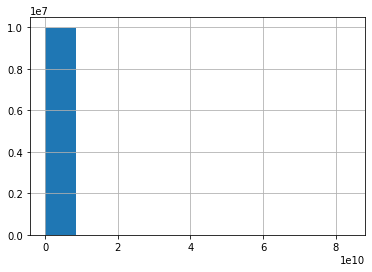

In [8]:
df["timediff"].hist()

In [35]:
df["longkyukei"] = (df["timediff"] > 1000*60*60*24*30).astype("uint8")
df["longkyukei"] = df.groupby("user_id")["longkyukei"].cumsum()

In [36]:
df["longkyukei"].sum()

3970248

In [37]:
df.groupby("longkyukei")["answered_correctly"].describe()

,count,mean,std,min,25%,50%,75%,max
longkyukei,,,,,,,,
0,7640737.0,0.619902,0.523306,-1.0,0.0,1.0,1.0,1.0
1,1462230.0,0.632286,0.523670,-1.0,0.0,1.0,1.0,1.0
2,541367.0,0.621384,0.529486,-1.0,0.0,1.0,1.0,1.0
3,229197.0,0.634703,0.521775,-1.0,0.0,1.0,1.0,1.0
4,100590.0,0.657342,0.513091,-1.0,0.0,1.0,1.0,1.0
5,43144.0,0.657496,0.506862,-1.0,0.0,1.0,1.0,1.0
6,6667.0,0.582421,0.543552,-1.0,0.0,1.0,1.0,1.0
7,2959.0,0.590064,0.534714,-1.0,0.0,1.0,1.0,1.0
8,3916.0,0.601379,0.525895,-1.0,0.0,1.0,1.0,1.0


In [38]:
w_df = df[df["user_id"].isin(df[df["longkyukei"] == 1]["user_id"].drop_duplicates().values)]

In [39]:
aa = w_df.groupby(["user_id", "longkyukei"])["answered_correctly"].describe()

In [40]:
aa.head(100)

count      mean       std  min   25%  50%   75%  max
user_id  longkyukei                                                      
138650   0           999.0  0.682683  0.504896 -1.0  0.00  1.0  1.00  1.0
         1            66.0  0.727273  0.448775  0.0  0.00  1.0  1.00  1.0
         2            20.0  0.650000  0.489360  0.0  0.00  1.0  1.00  1.0
         3            10.0  0.700000  0.483046  0.0  0.25  1.0  1.00  1.0
         4            10.0  0.600000  0.516398  0.0  0.00  1.0  1.00  1.0
408250   0            53.0  0.566038  0.500363  0.0  0.00  1.0  1.00  1.0
         1            15.0  0.533333  0.516398  0.0  0.00  1.0  1.00  1.0
         2            43.0  0.627907  0.535557 -1.0  0.00  1.0  1.00  1.0
         3           341.0  0.721408  0.492693 -1.0  0.00  1.0  1.00  1.0
         4            55.0  0.654545  0.551704 -1.0  0.00  1.0  1.00  1.0
745460   0            30.0  0.433333  0.504007  0.0  0.00  0.0  1.00  1.0
         1            17.0  0.705882  0.469668  0.0  0.00  1.0  1.00  1.0
841970   0             4.0  0.500000  0.577350  0.0  0.00  0.5  1.00  1.0
         1            26.0  0.192308  0.401918  0.0  0.00  0.0  0.00  1.0
1095490  0            19.0  0.473684  0.512989  0.0  0.00  0.0  1.00  1.0
         1             1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
2362760  0            10.0  0.200000  0.421637  0.0  0.00  0.0  0.00  1.0
         1            53.0  0.490566  0.541460 -1.0  0.00  1.0  1.00  1.0
2381110  0            52.0  0.423077  0.536735 -1.0  0.00  0.0  1.00  1.0
         1            10.0  0.700000  0.483046  0.0  0.25  1.0  1.00  1.0
2718040  0            30.0  0.866667  0.345746  0.0  1.00  1.0  1.00  1.0
         1             4.0  0.750000  0.500000  0.0  0.75  1.0  1.00  1.0
3180340  0           144.0  0.638889  0.496296 -1.0  0.00  1.0  1.00  1.0
         1           638.0  0.725705  0.477103 -1.0  0.00  1.0  1.00  1.0
3891860  0            80.0  0.562500  0.499208  0.0  0.00  1.0  1.00  1.0
         1            44.0  0.727273  0.499471 -1.0  0.75  1.0  1.00  1.0
         2            10.0  0.500000  0.527046  0.0  0.00  0.5  1.00  1.0
4061710  0            63.0  0.634921  0.517487 -1.0  0.00  1.0  1.00  1.0
         1           137.0  0.496350  0.530317 -1.0  0.00  1.0  1.00  1.0
4247900  0            30.0  0.366667  0.490133  0.0  0.00  0.0  1.00  1.0
         1            10.0  0.800000  0.421637  0.0  1.00  1.0  1.00  1.0
         2            20.0  0.450000  0.510418  0.0  0.00  0.0  1.00  1.0
4550430  0           257.0  0.587549  0.580544 -1.0  0.00  1.0  1.00  1.0
         1             4.0  0.500000  0.577350  0.0  0.00  0.5  1.00  1.0
4577710  0             7.0  0.571429  0.534522  0.0  0.00  1.0  1.00  1.0
         1            24.0  0.666667  0.481543  0.0  0.00  1.0  1.00  1.0
         2           206.0  0.635922  0.557408 -1.0  0.00  1.0  1.00  1.0
4650630  0            30.0  0.433333  0.504007  0.0  0.00  0.0  1.00  1.0
         1           134.0  0.425373  0.553551 -1.0  0.00  0.0  1.00  1.0
5002570  0             3.0  0.333333  0.577350  0.0  0.00  0.0  0.50  1.0
         1            18.0  0.388889  0.607685 -1.0  0.00  0.0  1.00  1.0
         2             4.0  0.250000  0.500000  0.0  0.00  0.0  0.25  1.0
5129280  0             4.0  0.750000  0.500000  0.0  0.75  1.0  1.00  1.0
         1            26.0  0.192308  0.401918  0.0  0.00  0.0  0.00  1.0
5246130  0           103.0  0.475728  0.539511 -1.0  0.00  0.0  1.00  1.0
         1            11.0  0.363636  0.674200 -1.0  0.00  0.0  1.00  1.0
5659730  0           440.0  0.645455  0.478920  0.0  0.00  1.0  1.00  1.0
         1            10.0  0.500000  0.527046  0.0  0.00  0.5  1.00  1.0
         2            20.0  0.500000  0.512989  0.0  0.00  0.5  1.00  1.0
5832290  0             4.0  0.500000  0.577350  0.0  0.00  0.5  1.00  1.0
         1             3.0  0.666667  0.577350  0.0  0.50  1.0  1.00  1.0
         2             3.0  0.333333  0.577350  0.0  0.00  0.0  0.50  1.0
         3            14.

In [42]:
df.groupby("longkyukei")["answered_correctly"].describe()

,count,mean,std,min,25%,50%,75%,max
longkyukei,,,,,,,,
0,7640737.0,0.619902,0.523306,-1.0,0.0,1.0,1.0,1.0
1,1462230.0,0.632286,0.523670,-1.0,0.0,1.0,1.0,1.0
2,541367.0,0.621384,0.529486,-1.0,0.0,1.0,1.0,1.0
3,229197.0,0.634703,0.521775,-1.0,0.0,1.0,1.0,1.0
4,100590.0,0.657342,0.513091,-1.0,0.0,1.0,1.0,1.0
5,43144.0,0.657496,0.506862,-1.0,0.0,1.0,1.0,1.0
6,6667.0,0.582421,0.543552,-1.0,0.0,1.0,1.0,1.0
7,2959.0,0.590064,0.534714,-1.0,0.0,1.0,1.0,1.0
8,3916.0,0.601379,0.525895,-1.0,0.0,1.0,1.0,1.0
